Task 1.0 example answer: **Name: *Jack Muir*, Email: *jmuir@caltech.edu* **

# Lab # 1 - Introduction to Observational Seismology in Python

Welcome to the first laboratory task of observational seismology. In this set of laboratories, we will learn the skills of modern observational seismology via the Python/Obspy workflow. Today, you will implement a basic seismological workflow; downloading, selecting, processing and plotting seismic waveforms. We will be skipping over some parts of the scientific python ecosystem in favor of jumping right into the seismology - these will be saved for the second lab session. 

## Using the Jupyter Notebook

Jupyter notebooks are a mixture of code cells and markdown text cells. Markdown is a light markup language that allows some flexibility in specifying textual effects (headers, italics etc.) without making the user choose different fonts / sizes etc - for reference, see https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet. Code blocks are executed using a Python kernel. Jupyter is a modal editor; it has a command mode, entered by the **esc** key, and an editing mode, entered by double clicking a cell. In the command mode, you can make a cell markdown by pressing **m**, and code by pressing **y**. To execute a cell, press **shift + enter**. You can create a new cell above by pressing **a**, and below by pressing **b**, whilst in command mode. Try to keep code cells short to keep the logic of your worksheet simple. There are many other keyboard shortcuts that you can find in the Jupyter documentation, and you can also use the menus to perform these tasks.

### Task 1.0

Create a cell above the notebook title containing your name and email address like so: **Name: *your-name* Email: *your-email* **

*note here - hopefully students realize that they can double click on this cell to edit it and then just copy the formatting that they see here*

## Importing Obspy

In the Python ecosystem, most interesting pieces of code are kept in modules that must be imported. By a quirk of the Obspy module, we have to import different submodules seperately - see below:

In [10]:
#A fdsn client allow us to connect with web services for obtaining data
from obspy.clients.fdsn import Client
#The UTCDateTime module specifies times in a consistent fashion - useful for specifying dates precisely 
from obspy import UTCDateTime
#we can add a "keyword argument" like "timeout" below to certain functions - keyword arguments allow Python functions 
#support variable numbers of arguments easily; once the keyword arguments start, their order doesn't matter
#we create a new client connected to the IRIS webservice, and increase the timeout value from its default 120s because
#2 minutes is often not enough to download all the data we want. 
iris_client = Client("IRIS", timeout=600)

## Searching for Events

One of the first things we are often intested in is the location and magnitude of an event. Whilst deriving these from seismograms is nontrivial, for historical events we can often fetch them from a catalogue. Lets look at a recent large earthquake in the Americas, the **2010 Maule earthquake**. 

In [12]:
#we use a UTCDateTime object to set the starting time of our search
st = UTCDateTime("2010-02-27T00:00:00Z")
#we can add a time offset in seconds to get the end time of the search
et = st + 24*3600
#or equivalently just use another UTCDateTime object
et = UTCDateTime("2010-02-28T00:00:00Z")
#we can then use the fdsn client to download an event catalogue, 
#specifying a large minimum magnitude to restrict the results
catalogue = iris_client.get_events(starttime=st, endtime=et, minmagnitude=8)

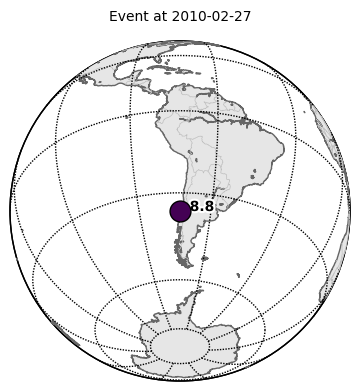

1 Event(s) in Catalog:
2010-02-27T06:34:13.330000Z | -36.148,  -72.933 | 8.8 MW

In [14]:
#we can let obspy automatically plot the results in a nice way - the orthographic "ortho" projection shows the location
#in a continental context. 
catalogue.plot(projection='ortho')
#writing a variable like so will print it to the output
catalogue

### Task 1.1
Make a plot of all > 6.5 magnitude earthquakes in South America between the latitudes of 30S and 0, and longitudes of 85W and 30W, from 1975 to the beginning of 2017. Make the projection local & turn the magnitude label off so that you can see the spatial variation clearly. 
##### Questions:
 - What spatial features do you see in the data? 
 - From your knowledge of plate tectonics, what are the likely causes of these features?

#### *Hint*: 
You should look at the Obspy documentation to observe how to restrict the spatial range of your search appropriately, and to turn the magnitude plotting off. The url for the catalogue search is https://docs.obspy.org/packages/autogen/obspy.clients.fdsn.client.Client.get_events.html
and for the catalogue plotting
https://docs.obspy.org/packages/autogen/obspy.core.event.catalog.Catalog.plot.html#obspy.core.event.catalog.Catalog.plot

#### Your Code: 

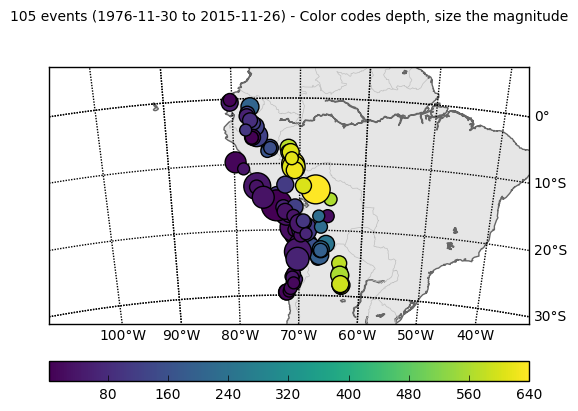

In [16]:
# Start your code here: 

#A possible acceptible answer
st = UTCDateTime("1975-01-01T00:00:00Z")
et = UTCDateTime("2017-01-01T00:00:00Z")

catalogue = client.get_events(starttime=st, 
                              endtime=et, 
                              minmagnitude=6.5,
                              minlongitude=-85,
                              maxlongitude=-30,
                              minlatitude=-30,
                              maxlatitude=0)

catalogue.plot(projection='local', label=None);

#### Your Answer to the questions:

##### Example good answer:
The earthquakes are concentrated on the western coast of South America. Furthermore, we see that the earthquakes generally increase in depth away from the coastline. We know that the Atlantic coast of South America is a passive continental margin, which explains the lack of large seismicity. Additionally, we know that the Nazca plate subducts beneath the South American plate on the Pacific Coast; the deepening seismicity tracks the subducting slab as it penetrates into the mantle.

## Downloading

In [5]:
evt_st = catalogue[0].origins[0].time
seismograms = client.get_waveforms(network = "CI", 
                                   station = "USC", 
                                   location = "", 
                                   channel = "BH*", 
                                   starttime = evt_st, 
                                   endtime = evt_st+3600)

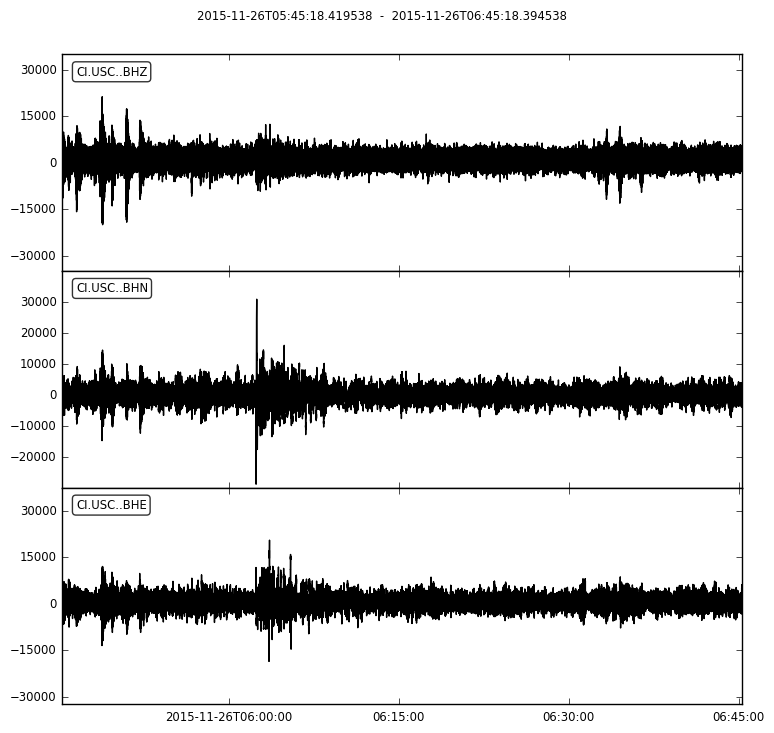

In [6]:
seismograms.plot()

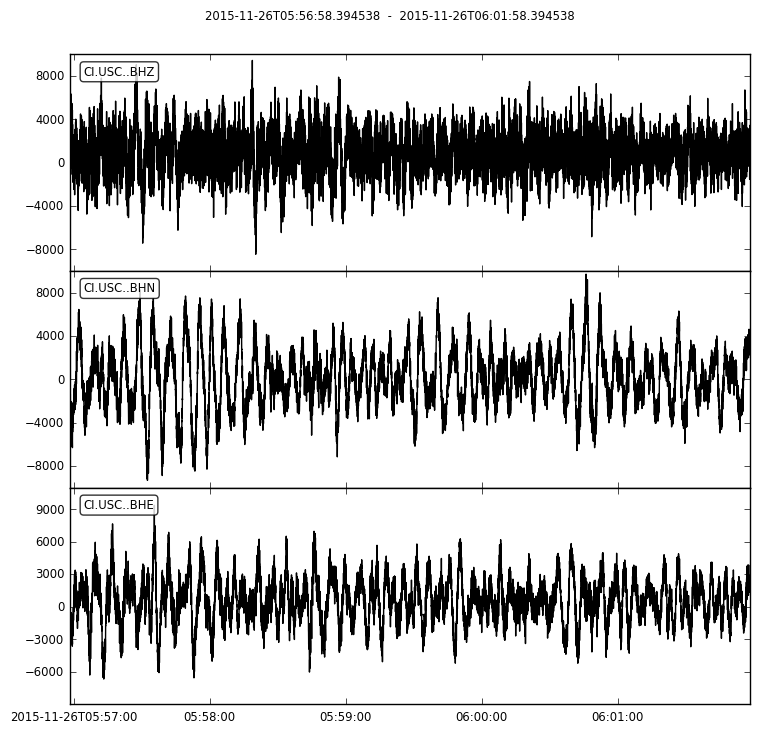

In [7]:
p_wave_seismogram = seismograms.copy().trim(starttime=evt_st+700, endtime=evt_st+1000)
p_wave_seismogram.plot()

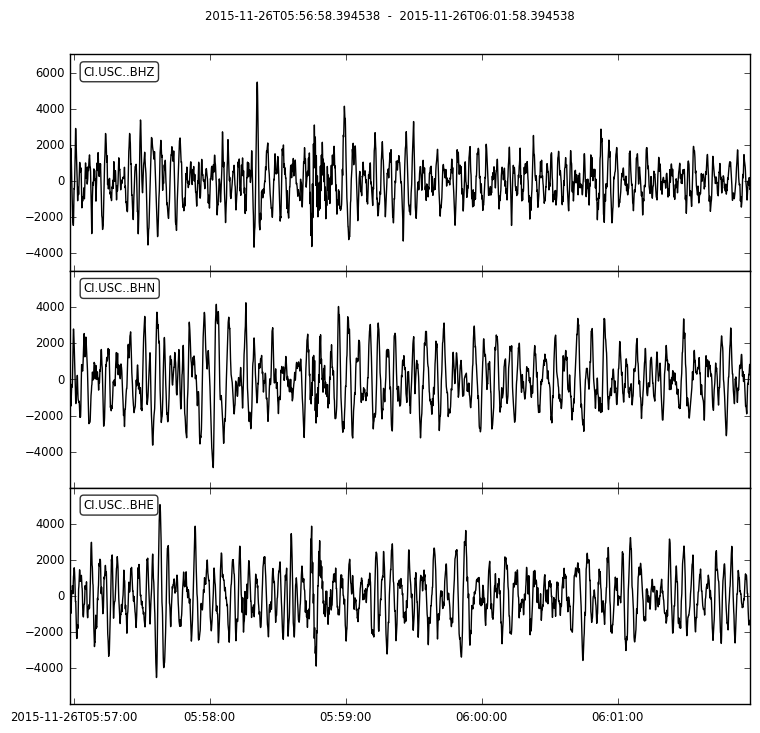

In [8]:
p_wave_seismogram.copy().filter('bandpass', freqmin=0.2, freqmax=2).plot()